In [100]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [101]:
df = pd.read_csv("C:/Users/mrfai/OneDrive/سطح المكتب/fraudTest.csv")
df.info()
#Display the data
#df.head()
#df.info()
#Sum the missing value
df.isnull().sum()
#df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [102]:
#Distribute the class
df[('is_fraud')].value_counts()


is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [103]:
# Convert 'trans_date_trans_time' to datetime using the correct format
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%m/%d/%Y %H:%M').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%m/%d/%Y %H:%M').dt.time

# Check the dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [104]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)


In [105]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_date  555719 non-null  object 
 1   trans_time  555719 non-null  object 
 2   cc_num      555719 non-null  float64
 3   merchant    555719 non-null  object 
 4   category    555719 non-null  object 
 5   amt         555719 non-null  float64
 6   first       555719 non-null  object 
 7   last        555719 non-null  object 
 8   gender      555719 non-null  object 
 9   street      555719 non-null  object 
 10  city        555719 non-null  object 
 11  state       555719 non-null  object 
 12  zip         555719 non-null  int64  
 13  lat         555719 non-null  float64
 14  long        555719 non-null  float64
 15  city_pop    555719 non-null  int64  
 16  job         555719 non-null  object 
 17  dob         555719 non-null  object 
 18  trans_num   555719 non-null  object 
 19  un

In [107]:
import pandas as pd

# Assuming df is already defined and contains your dataset

# Convert 'dob' to datetime with the correct format
df['dob'] = pd.to_datetime(df['dob'], format='%m/%d/%Y')

# Convert 'trans_time' to time using a more general format
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date (if it's not already in datetime format)
df['trans_date'] = pd.to_datetime(df['trans_date'], format='%m/%d/%Y')

# Check the data types after conversion
print("\nData types of the columns:")
print(df.dtypes)



Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


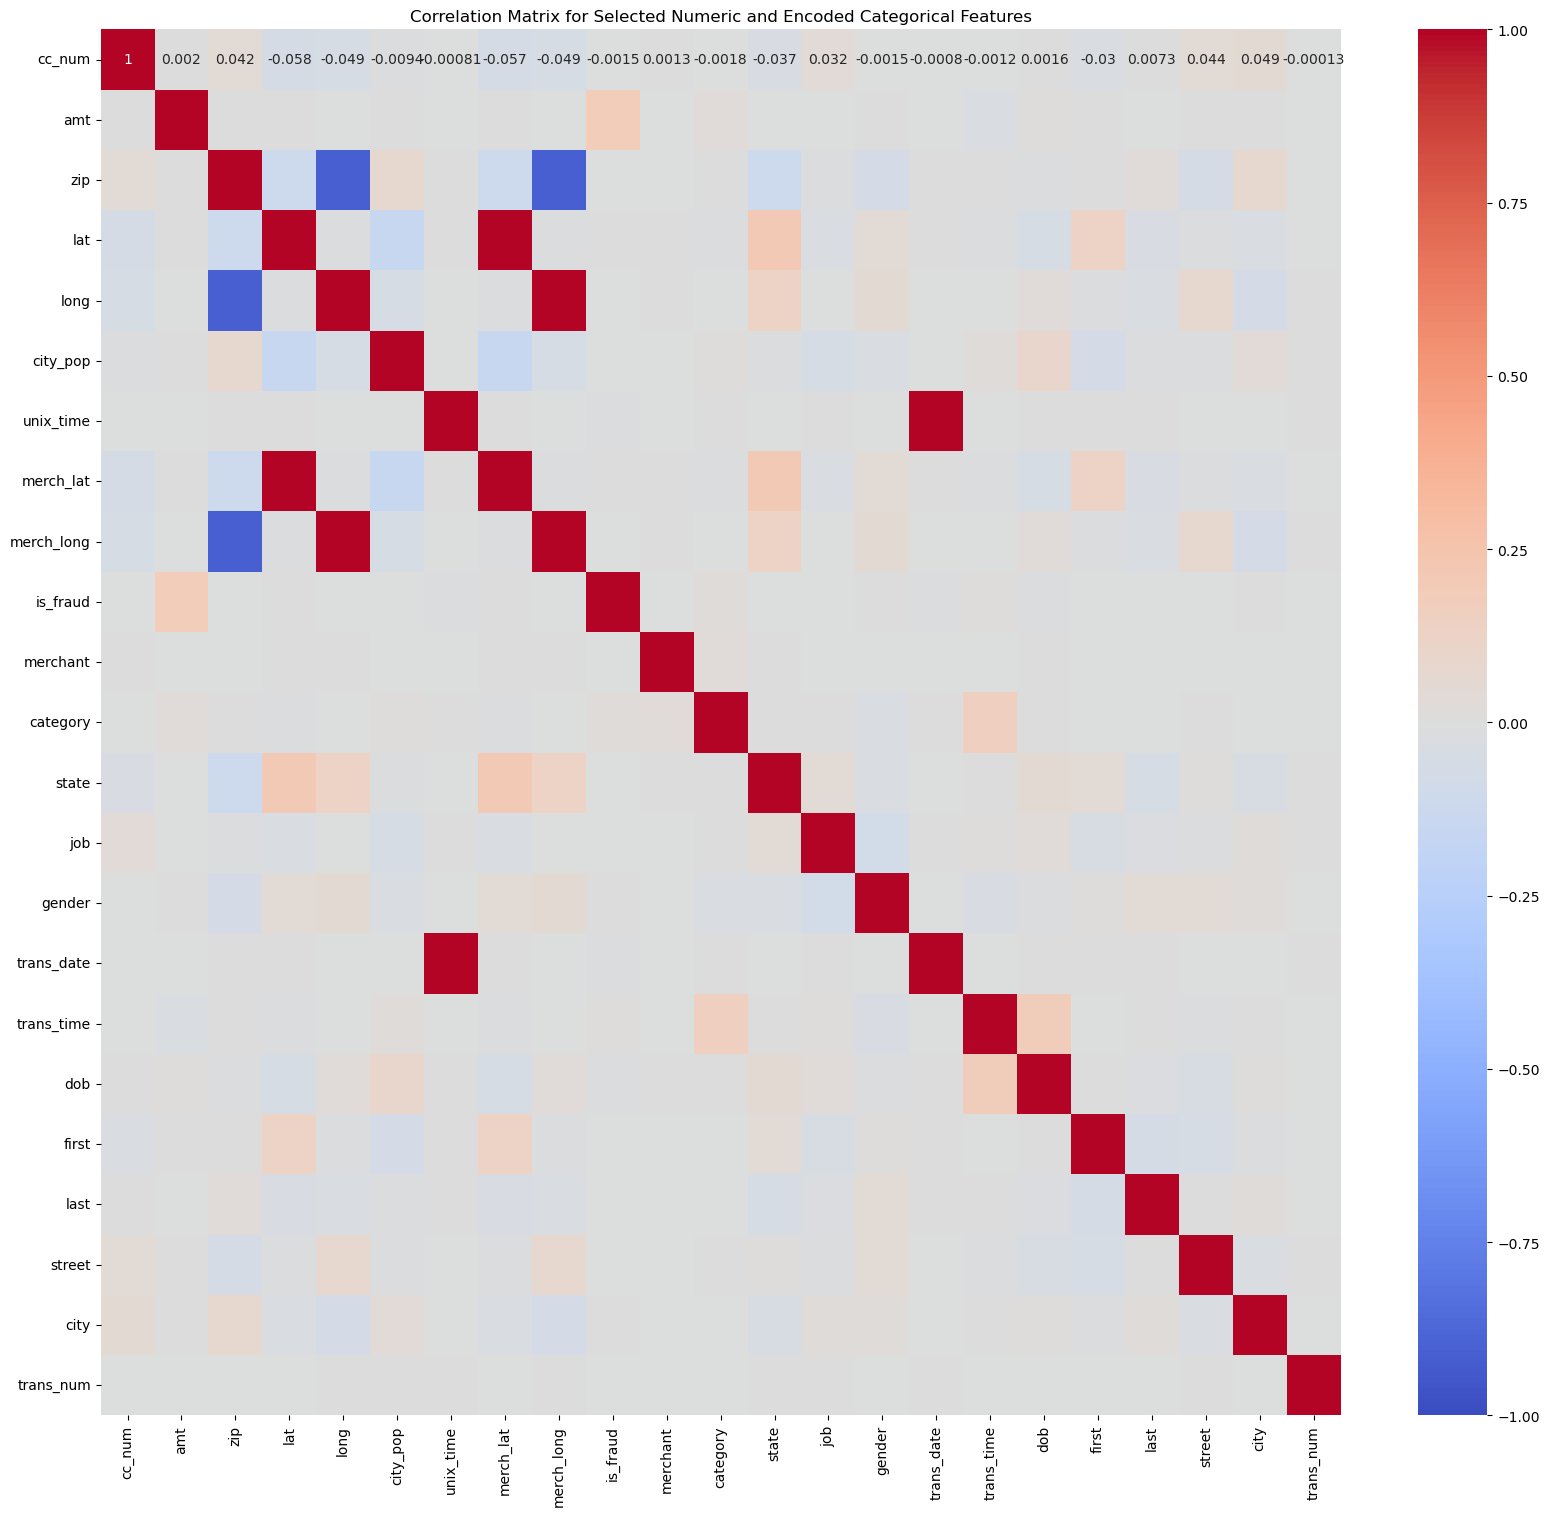

Top Positive Correlations with 'is_fraud':
amt           0.182267
category      0.016980
trans_time    0.011589
lat           0.005863
merch_lat     0.005812
city          0.001777
gender        0.000748
merchant     -0.000086
long         -0.000972
merch_long   -0.001060
Name: is_fraud, dtype: float64

Top Negative Correlations with 'is_fraud':
trans_date   -0.013121
unix_time    -0.013066
dob          -0.008264
state        -0.006075
job          -0.005074
city_pop     -0.004910
trans_num    -0.002816
zip          -0.002271
street       -0.001943
first        -0.001725
Name: is_fraud, dtype: float64


In [108]:
# Ensure all necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Ensure 'amt' is numeric and convert if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Handling categorical variables after removing unnecessary ones (trans_time, first, last, street, city, trans_num)
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'state', 'job', 'gender','trans_date', 'trans_time', 'dob', 'first', 'last', 'street', 'city', 'trans_num']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Select only numeric columns for correlation calculation
numeric_columns = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'] + categorical_columns
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Numeric and Encoded Categorical Features')
plt.show()

# Extract and sort correlation pairs
corr_pairs = corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort")

# Extract correlations with respect to 'is_fraud'
is_fraud_corr = corr_matrix['is_fraud'].drop('is_fraud')

# Sort and display the top positive and negative correlations with 'is_fraud'
print("Top Positive Correlations with 'is_fraud':")
print(is_fraud_corr.sort_values(ascending=False).head(10))  # Display top 10 positive correlations

print("\nTop Negative Correlations with 'is_fraud':")
print(is_fraud_corr.sort_values(ascending=True).head(10))  # Display top 10 negative correlations

###### amt 0.182267 is the most postively related to target.

##### Creating new features

In [109]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])
print(df.dtypes)

trans_date      int64
trans_time      int32
cc_num        float64
merchant        int32
category        int32
amt           float64
first           int32
last            int32
gender          int32
street          int32
city            int32
state           int32
zip             int64
lat           float64
long          float64
city_pop        int64
job             int32
dob             int64
trans_num       int32
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object


In [110]:

df['trans_date'] = pd.to_datetime(df['trans_date'])
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.date])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())

         cc_num trans_date  transactions_per_day
0  2.291164e+15 1970-01-01                   640
1  3.573030e+15 1970-01-01                   837
2  3.598215e+15 1970-01-01                  1073
3  3.591920e+15 1970-01-01                   663
4  3.526826e+15 1970-01-01                   891


In [111]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())


         cc_num  Week  transaction_per_week
0  2.291164e+15     1                   640
1  3.573030e+15     1                   837
2  3.598215e+15     1                  1073
3  3.591920e+15     1                   663
4  3.526826e+15     1                   891


In [112]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)


trans_date
1    555719
dtype: int64


In [113]:
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())


         cc_num trans_date  transactions_per_month
0  2.291164e+15 1970-01-01                     640
1  3.573030e+15 1970-01-01                     837
2  3.598215e+15 1970-01-01                    1073
3  3.591920e+15 1970-01-01                     663
4  3.526826e+15 1970-01-01                     891


In [114]:
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

print(df.dtypes)


trans_date                 datetime64[ns]
trans_time                          int32
cc_num                            float64
merchant                            int32
category                            int32
amt                               float64
first                               int32
last                                int32
gender                              int32
street                              int32
city                                int32
state                               int32
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int32
dob                                 int64
trans_num                           int32
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [119]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')


## Fraud Ratio

In [120]:
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')

## fraud transaction made by one user upon total transactions made by that user = ratio.
#Calculate ratio of fraudulent transactions to total transactions
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] /fraud_ratio_per_user['total_transactions']


# Merge the fraud ratio back into the original DataFrame
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')


# Print formatted output
print('\nThe ratio of fraudulent transaction to total transaction per user:')
for index, row in fraud_ratio_per_user.iterrows():
    print(f"Credit Card Number {int(row['cc_num'])}: {row['fraud_ratio']:.2%}")



The ratio of fraudulent transaction to total transaction per user:
Credit Card Number 60416207185: 0.00%
Credit Card Number 60422928733: 0.00%
Credit Card Number 60423098130: 0.00%
Credit Card Number 60427851591: 0.00%
Credit Card Number 60487002085: 3.35%
Credit Card Number 60490596305: 0.00%
Credit Card Number 60495593109: 5.36%
Credit Card Number 501803000000: 0.00%
Credit Card Number 501828000000: 0.00%
Credit Card Number 501831000000: 0.00%
Credit Card Number 501883000000: 5.08%
Credit Card Number 501899000000: 0.00%
Credit Card Number 502013000000: 0.00%
Credit Card Number 502038000000: 0.00%
Credit Card Number 502050000000: 0.00%
Credit Card Number 503848000000: 0.00%
Credit Card Number 503851000000: 100.00%
Credit Card Number 503874000000: 0.00%
Credit Card Number 560881000000: 0.00%
Credit Card Number 561943000000: 0.00%
Credit Card Number 565399000000: 0.00%
Credit Card Number 567868000000: 0.00%
Credit Card Number 568279000000: 0.00%
Credit Card Number 570273000000: 5.58%
C

In [121]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                          int32
cc_num                            float64
merchant                            int32
category                            int32
amt                               float64
first                               int32
last                                int32
gender                              int32
street                              int32
city                                int32
state                               int32
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int32
dob                                 int64
trans_num                           int32
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [122]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)


Aggregated transaction amounts by city:
     city       amt
0       0   9511.00
1       1  80383.39
2       2  20631.64
3       3  59000.66
4       4  18512.11
..    ...       ...
844   844  20281.72
845   845  42032.17
846   846  16073.89
847   847  59080.41
848   848  47801.39

[849 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
    state         amt
0       0    66071.94
1       1  1127922.81
2       2  1027950.44
3       3   347901.59
4       4  1768791.26
5       5   447073.46
6       6   205176.90
7       7   108781.32
8       8  1293183.50
9       9   780302.43
10     10    64858.25
11     11   770590.61
12     12   197705.27
13     13  1309975.89
14     14   846750.31
15     15   711303.48
16     16   856554.04
17     17   660432.25
18     18   324452.99
19     19   681750.67
20     20   433931.40
21     21  1399976.96
22     22   958127.38
23     23  1100293.98
24     24   599533.28
25     25   391608.59
26     26  1000257.3

#### Looking at all the datat types for old and new features

In [123]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                          int32
cc_num                            float64
merchant                            int32
category                            int32
amt                               float64
first                               int32
last                                int32
gender                              int32
street                              int32
city                                int32
state                               int32
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int32
dob                                 int64
trans_num                           int32
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [124]:
from sklearn.preprocessing import LabelEncoder
## handling all the categorical vairables after removing the unnccesary categorical variables namely - trans_time, first last, street, city, trans_num
label_encoder = LabelEncoder()
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['state'] = label_encoder.fit_transform(df['state'])
df['job'] = label_encoder.fit_transform(df['job'])

## got rid of these columns after team pre-processing
df = df.drop(columns=["first", "last", "street", "trans_num", "dob", "trans_date", "trans_time", "city_pop", "city", "lat", "long", "merch_lat", "merch_long", "zip"])
# Apply the mapping using pandas map function
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

df.info()
print(df.dtypes)

## variables like first and last name are not important or unique
## street, lat, long, city, merch_lat, merch_long , zip are removed as they dont have high or instead show negative corr with target variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cc_num                   555719 non-null  float64
 1   merchant                 555719 non-null  int64  
 2   category                 555719 non-null  int64  
 3   amt                      555719 non-null  float64
 4   gender                   0 non-null       float64
 5   state                    555719 non-null  int64  
 6   job                      555719 non-null  int64  
 7   unix_time                555719 non-null  int64  
 8   is_fraud                 555719 non-null  int64  
 9   transactions_per_day     555719 non-null  int64  
 10  Week                     555719 non-null  UInt32 
 11  transaction_per_week     555719 non-null  int64  
 12  transactions_per_month   555719 non-null  int64  
 13  transactions_per_season  555719 non-null  int64  
 14  avg_

##### Total newly selected columns

In [125]:
total_columns = df.shape[1]
print(f'Total number of columns: {total_columns}')

# Print all column headers
print("Column headers:")
print(df.columns.tolist())


Total number of columns: 23
Column headers:
['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'job', 'unix_time', 'is_fraud', 'transactions_per_day', 'Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount_x', 'total_trans_amount_x', 'med_trans_amount_x', 'std_trans_amount_x', 'avg_trans_amount_y', 'total_trans_amount_y', 'med_trans_amount_y', 'std_trans_amount_y', 'fraud_ratio']


###### Viewing the correlation matrix only for the new features wrt Target

c:\Users\mrfai\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


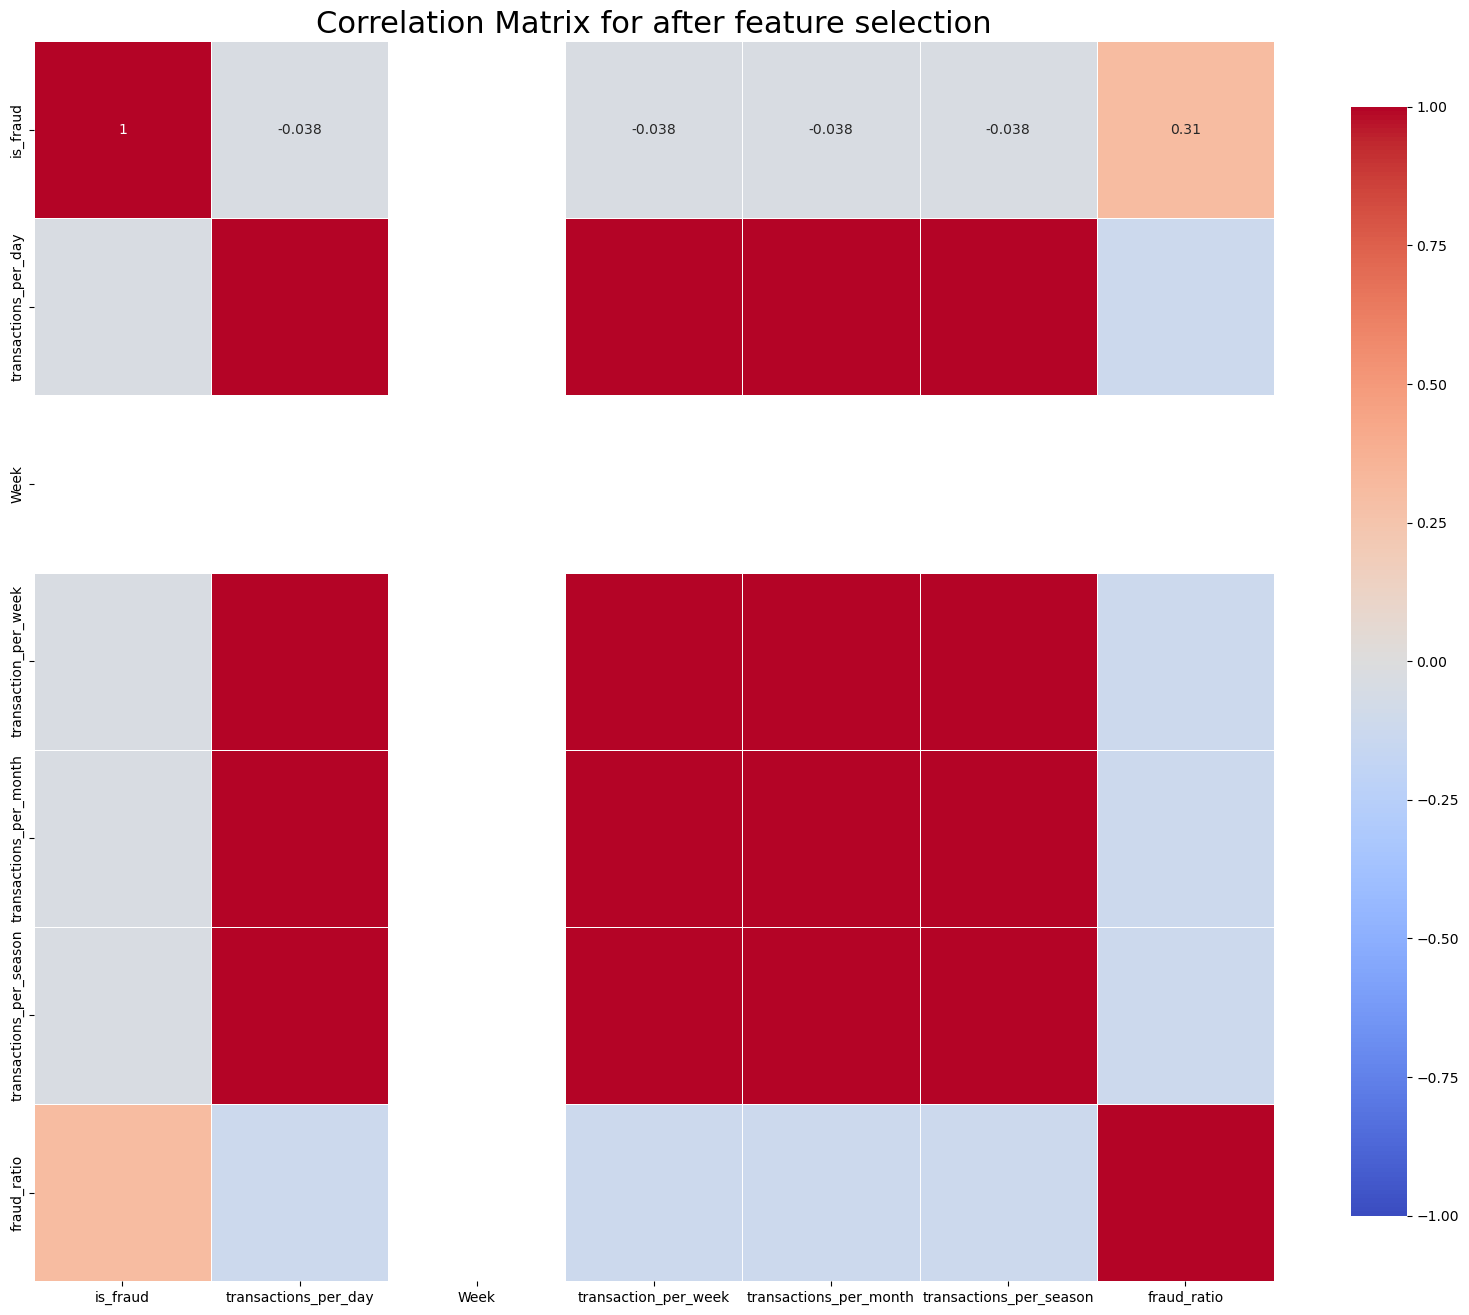

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'amt' is numeric and convert if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Select the specified numeric columns for correlation calculation
numeric_columns = [ 'is_fraud', 'transactions_per_day', 'Week', 'transaction_per_week', 
    'transactions_per_month', 'transactions_per_season',  'fraud_ratio'
]

df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(20, 18))  # Increased size for better visibility

# Draw the heatmap without a mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix for after feature selection', fontsize=22)
plt.xticks(fontsize=10)  # Smaller font size for x-axis labels
plt.yticks(fontsize=10)  # Smaller font size for y-axis labels
plt.show()


c:\Users\mrfai\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


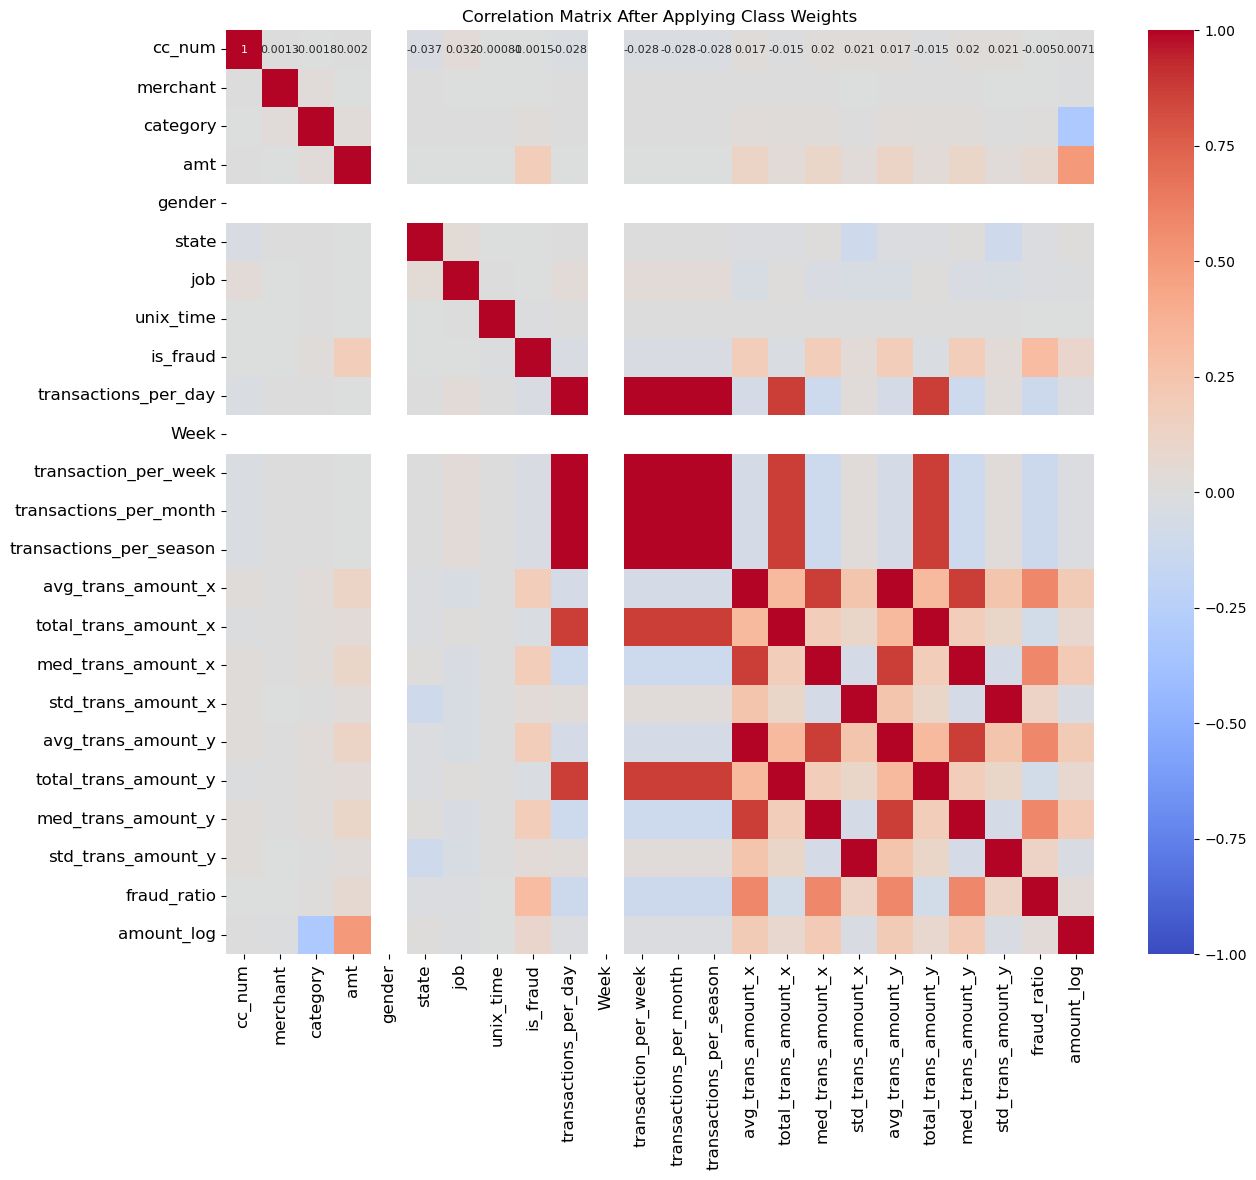

In [130]:
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Convert 'amt' to numeric if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Create new feature based on transaction amounts
df['amount_log'] = np.log(df['amt'] + 1)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(df['is_fraud']), y=df['is_fraud'])
class_weights_dict = dict(enumerate(class_weights))

# Optionally, you can use the class weights in your model training process.

# Exclude non-numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 12))  # Adjusted size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Adjusted font size
plt.title('Correlation Matrix After Applying Class Weights', fontsize=12)
plt.xticks(fontsize=12)  # Adjust x-axis labels font size
plt.yticks(fontsize=12)  # Adjust y-axis labels font size
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Split data into features (X) and targets (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to run Logistic Regression
def run_Logit(X_train, X_test, y_train, y_test, class_weight=None):
    logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=100,
        n_jobs=4,
        class_weight=class_weight
    )

    logit.fit(X_train, y_train)
    print('Train set')
    pred_train = logit.predict_proba(X_train)
    print('roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:, 1])))
    print('Test set')
    pred_test = logit.predict_proba(X_test)
    print('roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:, 1])))
    
    # Print Confusion Matrix
    y_test_pred = logit.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))
    
    # Print classification report
    print('\nClassification Report:')
    print(classification_report(y_test, y_test_pred))

# Run the Logistic Regression function
run_Logit(X_train_scaled, X_test_scaled, y_train, y_test)


(444575, 20) (111144, 20) (444575,) (111144,)
Train set
roc-auc: 0.9073736681496527
Test set
roc-auc: 0.9202786006185658
Confusion Matrix:
[[110687     31]
 [   339     87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.74      0.20      0.32       426

    accuracy                           1.00    111144
   macro avg       0.87      0.60      0.66    111144
weighted avg       1.00      1.00      1.00    111144



In [ ]:
#Evaluate model without cost-sensitive learning
print("Baseline model (no cost-sensitive learning):")
run_Logit(X_train, X_test, y_train, y_test, class_weight=None)

# Evaluate model with balanced class weights
print("\nModel with balanced class weights:")
run_Logit(X_train, X_test, y_train, y_test, class_weight='balanced')


Baseline model (no cost-sensitive learning):
Train set
roc-auc: 0.551084748356595
Test set
roc-auc: 0.5534607992372789
Confusion Matrix:
[[110718      0]
 [   426      0]]

Classification Report:


c:\Users\mrfai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mrfai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mrfai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144


Model with balanced class weights:
Train set
roc-auc: 0.516761783577858
Test set
roc-auc: 0.5289166309840837
Confusion Matrix:
[[ 10105 100613]
 [    32    394]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17    110718
           1       0.00      0.92      0.01       426

    accuracy                           0.09    111144
   macro avg       0.50      0.51      0.09    111144
weighted avg       0.99      0.09      0.17    111144



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Assuming X and y are defined as in your dataset description

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to run Random Forest Classifier
def run_RandomForest(X_train, X_test, y_train, y_test, class_weight):
    rf = RandomForestClassifier(
        n_estimators=100,
        random_state=0,
        n_jobs=4,
        class_weight= class_weight  # weights / cost
    )
    
    rf.fit(X_train, y_train)
    print('Train set')
    pred_train = rf.predict_proba(X_train)
    print('roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:, 1])))
    
    print('Test set')
    pred_test = rf.predict_proba(X_test)
    print('roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:, 1])))

    # Print classification report
    print('\nClassification Report:')
    y_test_pred = rf.predict(X_test)
    print(classification_report(y_test, y_test_pred))

    # Print Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))

# Call the function to run Random Forest with balanced class weights
print("\nModel with balanced class weights:")
run_RandomForest(X_train_scaled, X_test_scaled, y_train, y_test, class_weight='balanced')


(444575, 20) (111144, 20) (444575,) (111144,)

Model with balanced class weights:
Train set
roc-auc: 1.0
Test set
roc-auc: 0.9911331537458401

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.95      0.76      0.84       426

    accuracy                           1.00    111144
   macro avg       0.97      0.88      0.92    111144
weighted avg       1.00      1.00      1.00    111144

Confusion Matrix:
[[110701     17]
 [   104    322]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X and y are defined as in your dataset description

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate class weights
def calculate_class_weights(y):
    class_counts = np.bincount(y)
    total_samples = len(y)
    class_weights = {0: total_samples / (2 * class_counts[0]),
                     1: total_samples / (2 * class_counts[1])}
    return class_weights

# Function to run K-Nearest Neighbors Classifier
def run_KNN(X_train, X_test, y_train, y_test):
    # Calculate class weights
    class_weights = calculate_class_weights(y_train)
    
    # Initialize KNN classifier
    knn_classifier = KNeighborsClassifier(weights='distance')  # Using 'distance' for weighted KNN
    
    # Fit KNN classifier
    knn_classifier.fit(X_train, y_train)
    
    # Print the score of the model on the test set
    print("\nK-Nearest Neighbors Classifier Model")
    print("Model accuracy:", knn_classifier.score(X_test, y_test))
    
    # Predict on the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

# Call the function to run KNN classifier with calculated class weights
print("\nModel with K-Nearest Neighbors Classifier:")
run_KNN(X_train_scaled, X_test_scaled, y_train, y_test)


(444575, 20) (111144, 20) (444575,) (111144,)

Model with K-Nearest Neighbors Classifier:

K-Nearest Neighbors Classifier Model
Model accuracy: 0.9980115885697833

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.83      0.61      0.70       426

    accuracy                           1.00    111144
   macro avg       0.91      0.80      0.85    111144
weighted avg       1.00      1.00      1.00    111144

Confusion Matrix:
[[110663     55]
 [   166    260]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
logreg_classifier = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train and evaluate Random Forest classifier
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
auprc_rf = average_precision_score(y_test, y_pred_rf)
print(f"\nRandom Forest AUPRC: {auprc_rf:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Train and evaluate Logistic Regression classifier
logreg_classifier.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_classifier.predict(X_test_scaled)
auprc_logreg = average_precision_score(y_test, y_pred_logreg)
print(f"\nLogistic Regression AUPRC: {auprc_logreg:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))



Random Forest AUPRC: 0.7157
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.93      0.77      0.84       426

    accuracy                           1.00    111144
   macro avg       0.97      0.88      0.92    111144
weighted avg       1.00      1.00      1.00    111144

Random Forest Confusion Matrix:
[[110695     23]
 [   100    326]]

Logistic Regression AUPRC: 0.0361
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    110718
           1       0.04      0.89      0.08       426

    accuracy                           0.92    111144
   macro avg       0.52      0.91      0.52    111144
weighted avg       1.00      0.92      0.95    111144

Logistic Regression Confusion Matrix:
[[101561   9157]
 [    45    381]]
